In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [4]:
time_window = 50
time_step = 25
trial_average = 20
n_splits = 30
group_dict = {0:color,1:ori}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
acc = []
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    beh = pd.DataFrame(exp.load_behavior(isub))
    acc.append(beh[beh['SetSize']==3].ACC.mean())
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [6]:
interp = decode_eeg.Interpreter(clfr)

In [7]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [16]:
def regression_line(slope: float, intercept: float):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',color='k',zorder=-1)

def plot_corr(x: list, y: list, plot_title = None, x_variable_name = 'X Variable', y_variable_name = 'Y Variable', stats_text = True):
    """Plot correlation between two variables of equal length"""

    # Use scipy.stats.linregress to calc correlation
    slope, intercept, r_value, p_value, std_err = sista.linregress(x, y)
    stats = {'slope':slope, 'intercept':intercept, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err}
    
    # Plotting variables
    ax = plt.subplot(111)
    ax.scatter(x,y,edgecolor='k',color='dodgerblue')

    # Plotting regression line
    regression_line(slope,intercept)

    # Plot labelling
    r_value_round = round(r_value**2,2)
    p_value_round = round(p_value,4)
    if stats_text:
        stats_string = f'$r^2$ = {r_value_round}\np = {p_value_round}'
        plt.text(.45,.75,stats_string,fontsize=12,bbox=dict(facecolor='none', edgecolor='lightgrey', boxstyle='round'))

    if plot_title:
        full_title = (plot_title)
        plt.title(full_title,fontsize=18)
    
    plt.xlabel(x_variable_name, fontsize=14)
    plt.ylabel(y_variable_name, fontsize=14)

    # Various plot beautification
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)

    # plt.yticks(np.arange(0,4,1))
    # plt.ylim([0.1,3.9])
    # plt.xlim([.28,.52])
    
    return stats

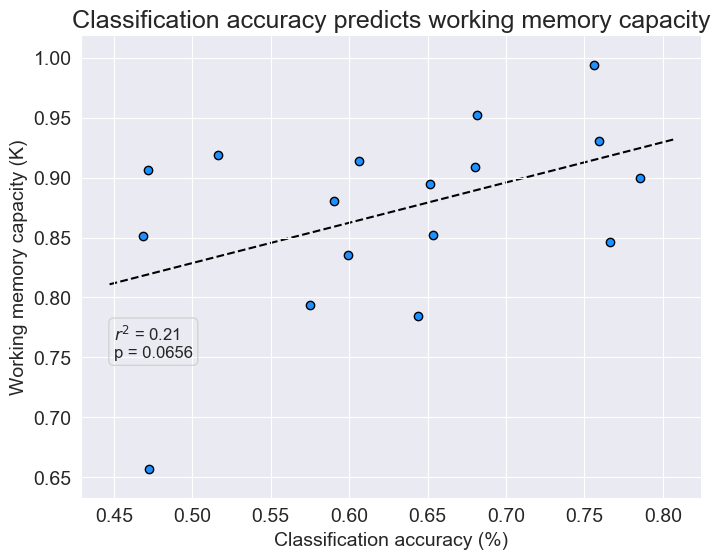

{'slope': 0.3362956283710088, 'intercept': 0.6605112156171011, 'r_value': 0.4563541251718468, 'p_value': 0.06557991463004342, 'std_err': 0.1693031955038722}


In [17]:
accs = np.mean(np.mean(interp.acc,2)[:,interp.t>250],1)
stats = plot_corr(
    list(accs),list(acc),
    plot_title='Classification accuracy predicts working memory capacity',
    x_variable_name='Classification accuracy (%)',
    y_variable_name='Working memory capacity (K)')
# plt.savefig('output/figures/classification_acc_k_corr.png',dpi=500,bbox_inches='tight')
# plt.savefig('output/figures/classification_acc_k_corr.pdf',dpi=500,bbox_inches='tight')
plt.show()
print(stats)

C:\Users\William\Anaconda3\envs\archery\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


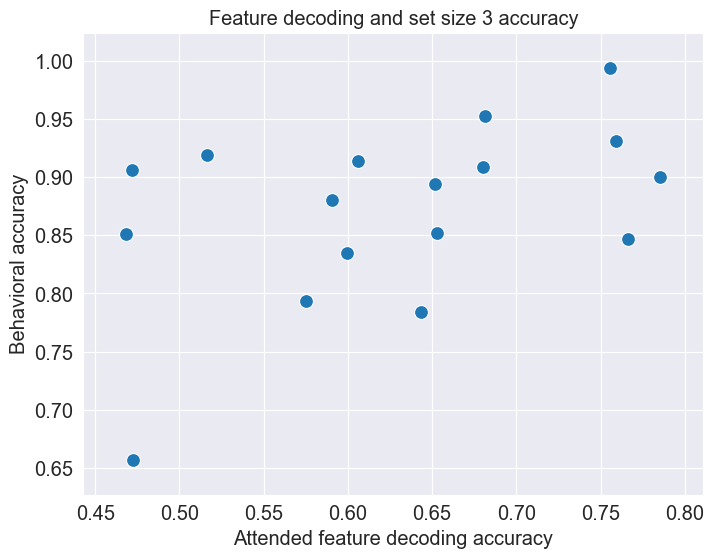

In [10]:
import seaborn as sns
sns.set_style('darkgrid')
load_acc = np.mean(np.mean(interp.acc,2)[:,interp.t>250],1)
sns.scatterplot(load_acc,acc,s=100)
plt.ylabel('Behavioral accuracy')
plt.xlabel('Attended feature decoding accuracy')
plt.title('Feature decoding and set size 3 accuracy')
# plt.savefig('output/figures/acc_decode_acc.png',bbox_inches='tight',dpi=500)
plt.show()

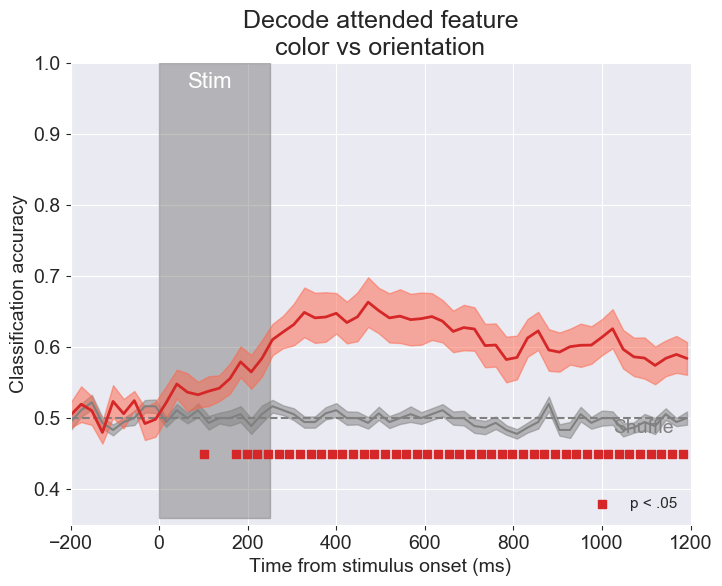

Significant timepoints: [ 112  184  208  232  256  280  304  328  352  376  400  424  448  472
  496  520  544  568  592  616  640  664  688  712  736  760  784  808
  832  856  880  904  928  952  976 1000 1024 1048 1072 1096 1120 1144
 1168 1192]
Mean delay accuracy: 0.6173055555555557
Mean delay S.D.: 0.02389926496715645


In [17]:

interp.labels = [1,2]
interp.plot_acc(significance_testing=True,savefig=False,ylim=[.35,1],chance_text_y=.23, title='Decode attended feature\ncolor vs orientation')

# single trial acc

In [ ]:
time_window = 50
time_step = 25
trial_average = 0
n_splits = 30
group_dict = {0:color,1:ori}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [59]:
beh_acc = np.zeros((exp.nsub,wrangl.n_splits))*np.nan
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    beh = pd.DataFrame(exp.load_behavior(isub))
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test,idx in wrangl.train_test_split(xdata,ydata,return_idx=True):
        beh_split = beh.loc[idx]
        beh_acc[isub,wrangl.ifold] = beh_split.ACC.mean()
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)
            

0
1
2
3
4
5
6
7
8


In [69]:
interp = decode_eeg.Interpreter(clfr)

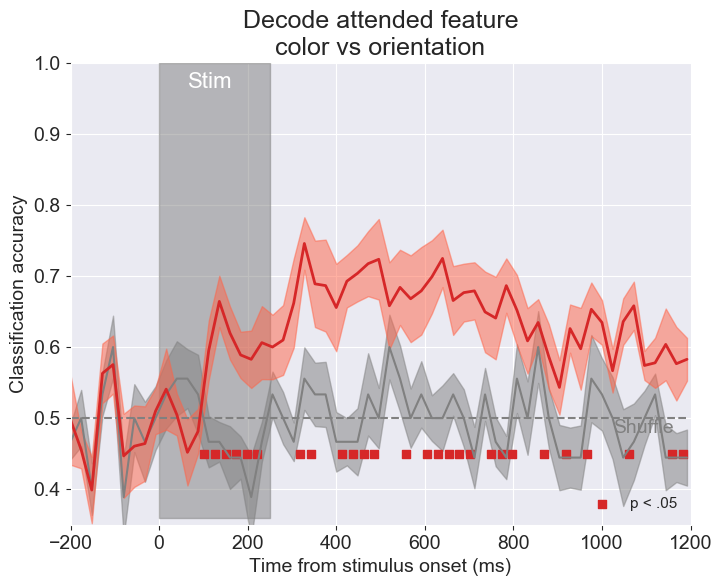

Significant timepoints: [ 112  136  160  184  208  232  328  352  424  448  472  496  568  616
  640  664  688  712  760  784  808  880  928  976 1072 1168 1192]
Mean delay accuracy: 0.6476543209876543
Mean delay S.D.: 0.048847251255211444


In [71]:

interp.labels = [1,2]
interp.plot_acc(significance_testing=True,savefig=False,ylim=[.35,1],chance_text_y=.23, title='Decode attended feature\ncolor vs orientation')

In [62]:
bacc = np.mean(beh_acc,1)

In [65]:
acc = np.mean(np.mean(clfr.acc[:,wrangl.t>250],2),1)

C:\Users\William\Anaconda3\envs\archery\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


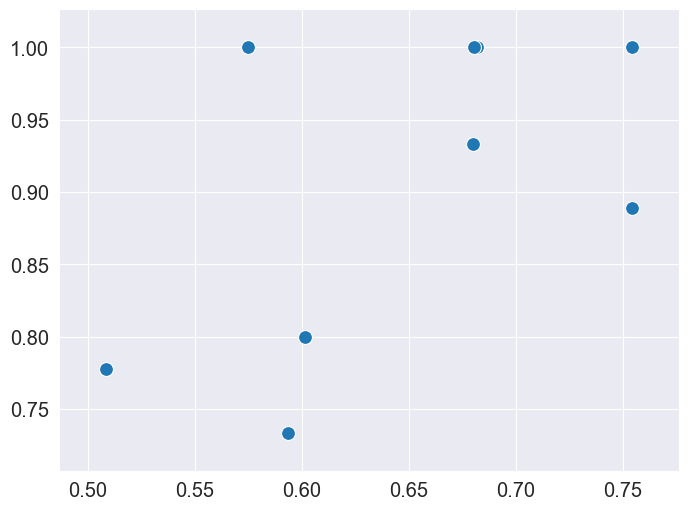

In [68]:
sns.scatterplot(acc,bacc,s=100)
plt.show()